In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('../../thesis/references/TestAccurracy.csv', sep=';')
df.head()

,id,set,year,onset_date,y_true,pred_date,y_pred_best,error_best,error_abs_best,y_pred_latest,error_latest,error_abs_latest
0,34,test,1985,30.05.1985,1,05/29,1.2358,0.2358,0.2358,-0.052827,-1.052827,1.052827
1,34,test,1985,30.05.1985,2,05/28,1.5560,-0.4440,0.4440,0.065858,-1.934142,1.934142
2,34,test,1985,30.05.1985,3,05/27,2.0656,-0.9344,0.9344,0.883725,-2.116275,2.116275
3,34,test,1985,30.05.1985,4,05/26,3.1431,-0.8569,0.8569,1.905645,-2.094355,2.094355
4,34,test,1985,30.05.1985,5,05/25,4.2556,-0.7444,0.7444,2.506734,-2.493266,2.493266


In [3]:
df = df.sort_values(by='pred_date')

In [4]:
df.isna().sum()

id                  0
set                 0
year                0
onset_date          0
y_true              0
pred_date           0
y_pred_best         0
error_best          0
error_abs_best      0
y_pred_latest       0
error_latest        0
error_abs_latest    0
dtype: int64

In [5]:
year_groups = df[df['id'] > 31].groupby(['set', 'year']).mean().reset_index()
year_groups

,set,year,id,y_true,y_pred_best,error_best,error_abs_best,y_pred_latest,error_latest,error_abs_latest
0,dev,1980,36.0,15.5,15.207238,-0.292762,2.455932,16.397451,0.897451,2.457338
1,dev,1990,36.0,15.5,23.149580,7.649580,7.879184,26.870906,11.370906,13.161564
2,dev,2000,36.0,15.5,10.744908,-4.755092,4.835664,12.119088,-3.380912,3.561595
3,dev,2010,36.0,15.5,19.098800,3.598800,5.337549,21.476949,5.976949,6.307754
4,dev,2016,36.0,15.5,11.930035,-3.569965,4.200936,11.860849,-3.639151,4.136955
5,test,1985,36.0,15.5,14.079157,-1.420843,3.067656,15.564742,0.064742,1.983346
6,test,1995,36.0,15.5,13.307276,-2.192724,3.535866,14.912927,-0.587073,2.610699
7,test,2003,36.0,15.5,13.699566,-1.800434,3.350704,14.509229,-0.990771,2.387890
8,test,2004,36.0,15.5,18.519020,3.019020,4.599107,19.985379,4.485379,5.305509
9,test,2005,36.0,15.5,14.091575,-1.408425,3.672447,14.129588,-1.370412,2.778753


In [26]:
df[df['id'] > 31].groupby(['onset_date']).mean()

,id,year,y_true,y_pred_best,error_best,error_abs_best,y_pred_latest,error_latest,error_abs_latest
onset_date,,,,,,,,,
03.06.2000,36.0,2000.0,15.5,10.744908,-4.755092,4.835664,12.119088,-3.380912,3.561595
04.06.1980,36.0,1980.0,15.5,15.207238,-0.292762,2.455932,16.397451,0.897451,2.457338
05.06.2015,36.0,2015.0,15.5,14.060261,-1.439739,2.803361,14.174548,-1.325452,2.960941
06.06.2014,36.0,2014.0,15.5,17.298371,1.798371,3.467480,17.978903,2.478903,3.646591
07.06.2005,36.0,2005.0,15.5,14.091575,-1.408425,3.672447,14.129588,-1.370412,2.778753
08.06.2016,36.0,2016.0,15.5,11.930035,-3.569965,4.200936,11.860849,-3.639151,4.136955
10.06.1995,36.0,1995.0,15.5,13.307276,-2.192724,3.535866,14.912927,-0.587073,2.610699
11.06.2003,36.0,2003.0,15.5,13.699566,-1.800434,3.350704,14.509229,-0.990771,2.387890
20.05.1990,36.0,1990.0,15.5,23.149580,7.649580,7.879184,26.870906,11.370906,13.161564


In [7]:
df.groupby(['set']).mean()

,id,year,y_true,y_pred_best,error_best,error_abs_best,y_pred_latest,error_latest,error_abs_latest
set,,,,,,,,,
dev,34.295082,2001.377049,15.5,15.393684,-0.106316,5.212633,16.976408,1.476408,6.165616
test,34.000000,2007.442308,15.5,15.543174,0.043174,3.579571,16.653315,1.153315,3.158635


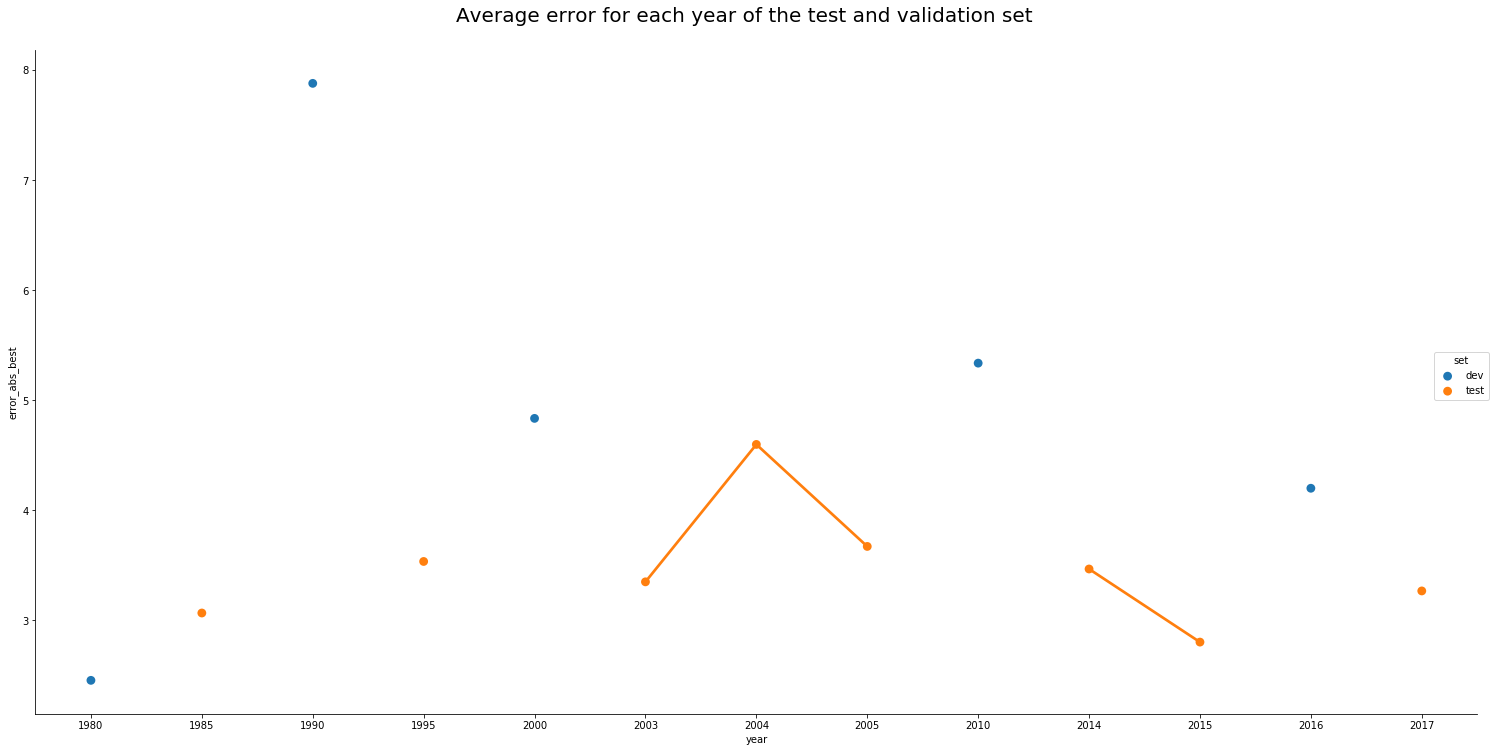

In [15]:
g = sns.factorplot(data=year_groups, x='year', y='error_abs_best', hue='set', aspect=2, size=10)

ttl = g.fig.suptitle('Average error for each year of the test and validation set', size=20)
ttl.set_position([0.5, 1.04])

plt.tight_layout()
plt.savefig('prediction_years.png')

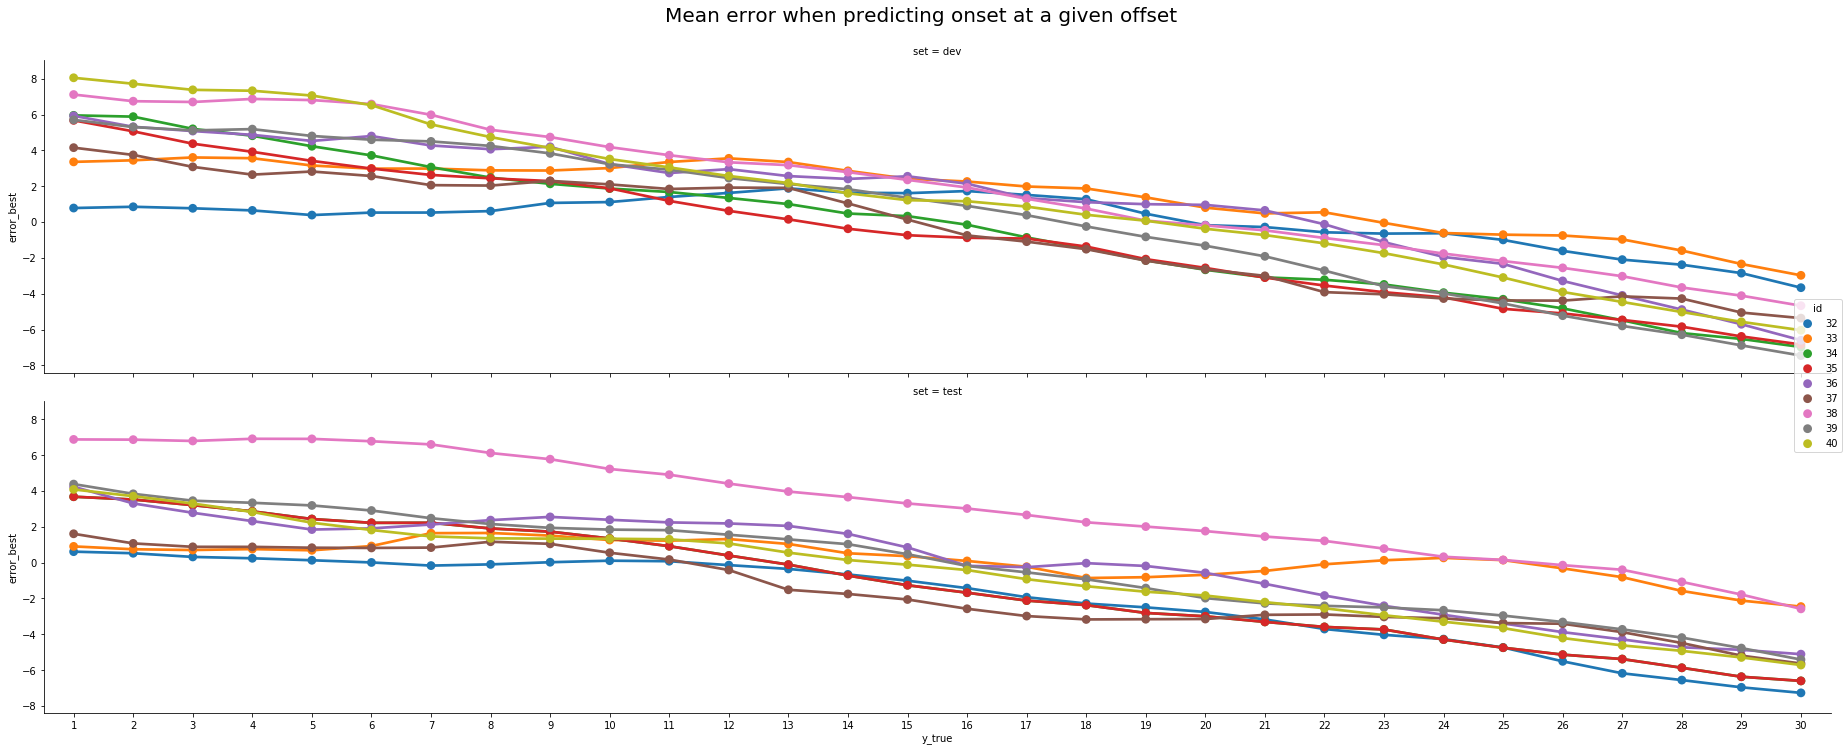

In [48]:
g = sns.factorplot(data=df[df['id'] > 31], x='y_true', y='error_best', hue='id', row='set', aspect=5, size=5, ci=None)

ttl = g.fig.suptitle('Mean error when predicting onset at a given offset', size=20)
ttl.set_position([0.5, 1.04])

plt.tight_layout()
plt.savefig('prediction_error_offset.png')

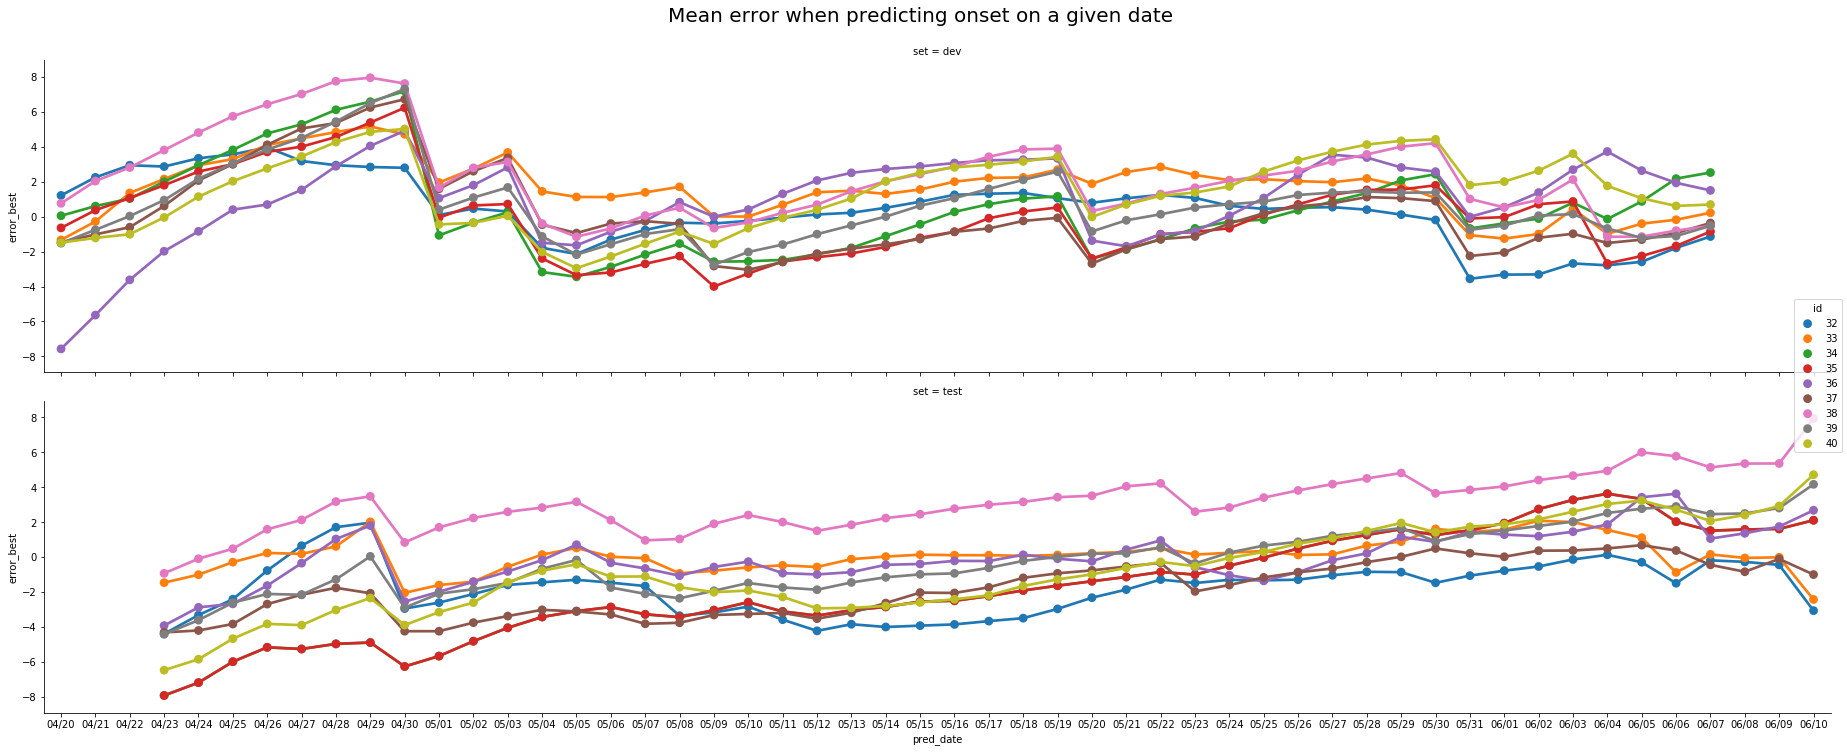

In [47]:
g = sns.factorplot(data=df[df['id'] > 31], x='pred_date', y='error_best', hue='id', row='set', aspect=5, size=5, ci=None)

ttl = g.fig.suptitle('Mean error when predicting onset on a given date', size=20)
ttl.set_position([0.5, 1.04])

plt.tight_layout()
plt.savefig('prediction_error_dates.png')

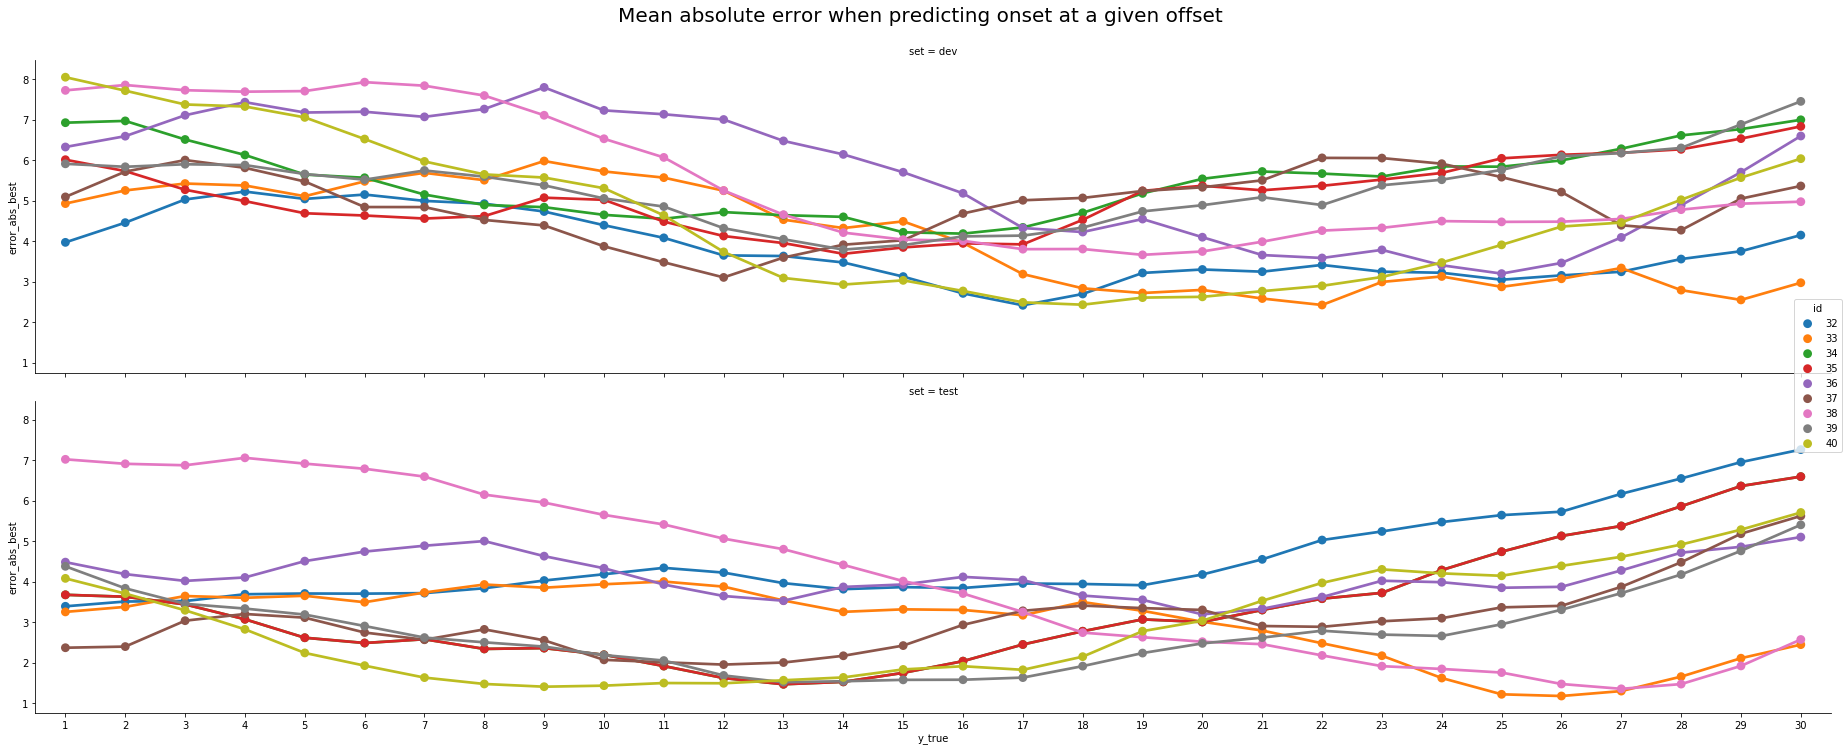

In [46]:
g = sns.factorplot(data=df[df['id'] > 31], x='y_true', y='error_abs_best', hue='id', row='set', aspect=5, size=5, ci=None)

ttl = g.fig.suptitle('Mean absolute error when predicting onset at a given offset', size=20)
ttl.set_position([0.5, 1.04])

plt.tight_layout()
plt.savefig('prediction_accuracy_offset.png')

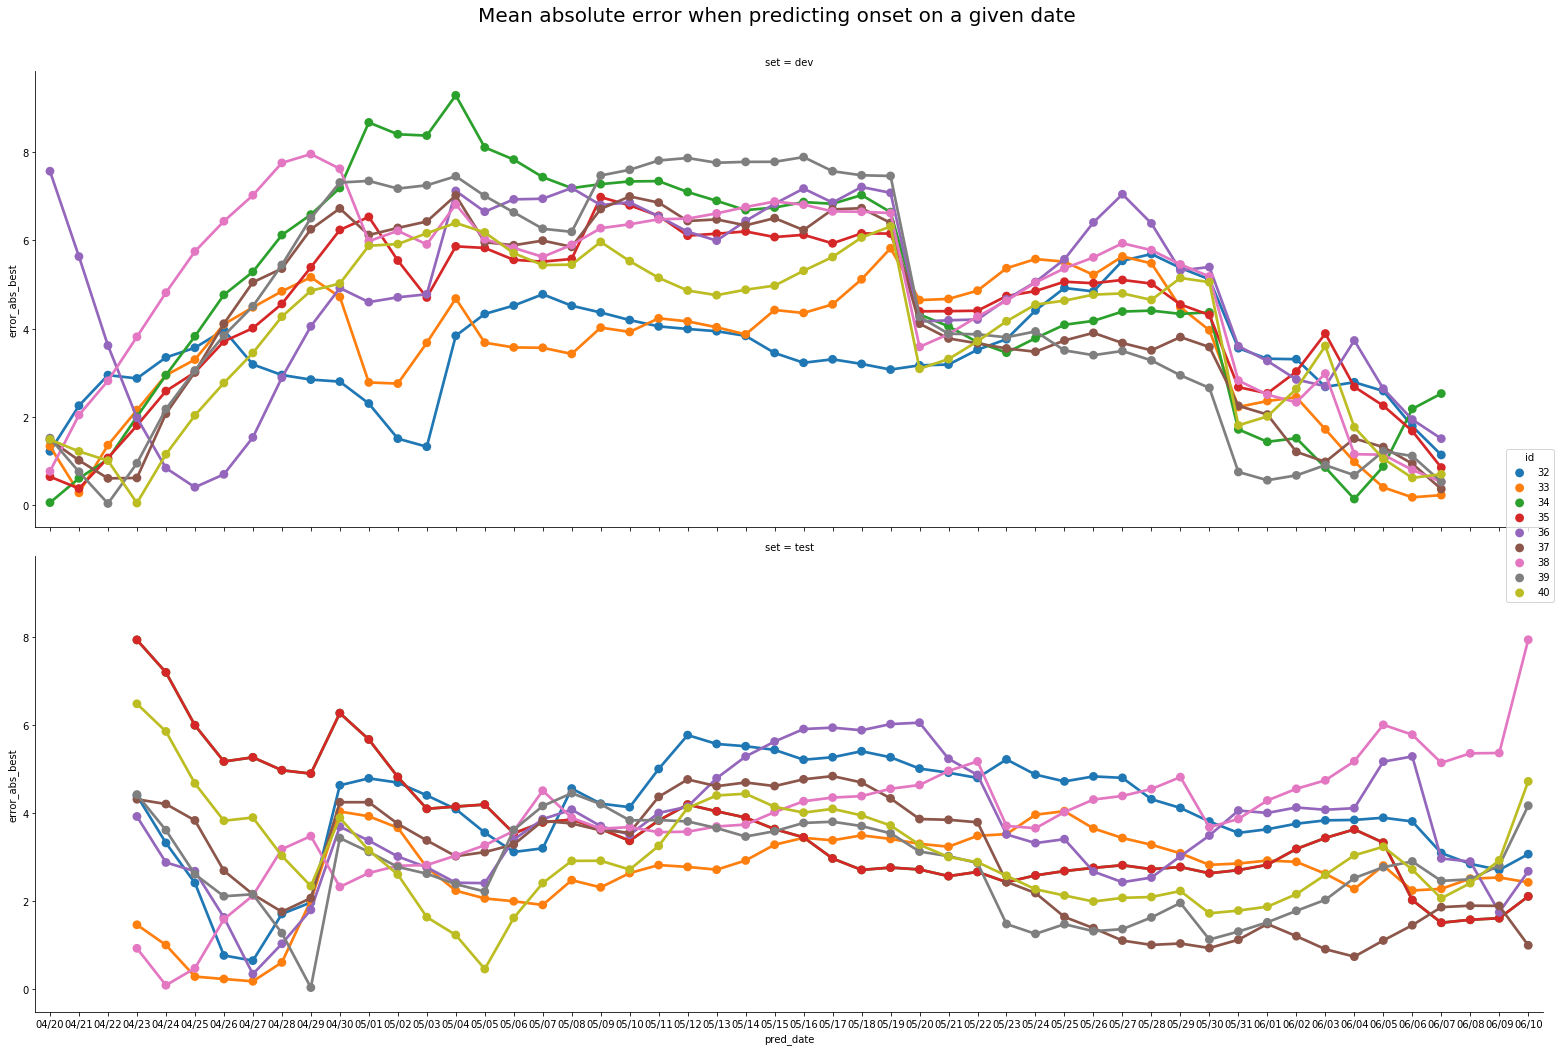

In [45]:
g = sns.factorplot(data=df[df['id'] > 31], x='pred_date', y='error_abs_best', hue='id', row='set', aspect=3, size=7, ci=None)

ttl = g.fig.suptitle('Mean absolute error when predicting onset on a given date', size=20)
ttl.set_position([0.5, 1.04])

plt.tight_layout()
plt.savefig('prediction_accuracy_dates.png')